### Discretization 

- Data discretization is the process of converting continuous data into discrete buckets by grouping it.
- Discretization is also known for easy maintainability of the data. Training a model with discrete data becomes faster and more effective than when attempting the same with continuous data. 
- Although continuous-valued data contains more information, huge amounts of data can slow the model down. Here, discretization can help us strike a balance between both. 
- The main challenge in discretization is to choose the number of intervals or bins and how to decide on their width.

In [4]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv(r'./data/student_bucket.csv')

In [114]:
df.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [115]:
df.marks.describe()

count    232.000000
mean      58.689655
std       23.200580
min       20.000000
25%       37.000000
50%       59.500000
75%       77.000000
max       98.000000
Name: marks, dtype: float64

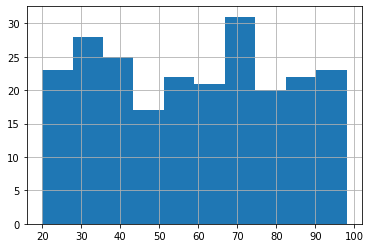

In [116]:
df['marks'].hist()

#### using pd.cut()

In [117]:
df['marks_cat'] = pd.cut(x = df['marks'], bins = 5, labels = ['Poor', 'Below Avg', 'Avg', 'Above Avg', 'Good'])

In [118]:
df['marks_cat'].value_counts()

Above Avg    51
Poor         51
Good         45
Avg          43
Below Avg    42
Name: marks_cat, dtype: int64

In [59]:
import matplotlib.pyplot as plt

In [98]:
def draw_barplot(x):
    s = x.value_counts()
    plt.bar(s.index, s.values)

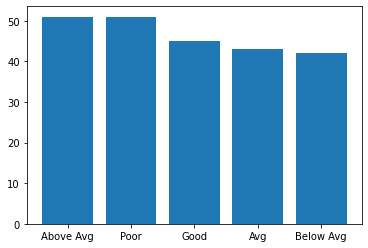

In [119]:
draw_barplot(df['marks_cat'])

In [120]:
df.head()

,Student_id,Age,Grade,Employed,marks,marks_cat
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below Avg
2,3,18,1st Class,no,57,Avg
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Avg


In [121]:
df['marks_cat2'] = pd.cut(x = df.marks, bins = [0, 30, 50, 60, 80, 100], labels = ['Poor', 'Below Avg', 'Avg', 'Above Avg', 'Good'])

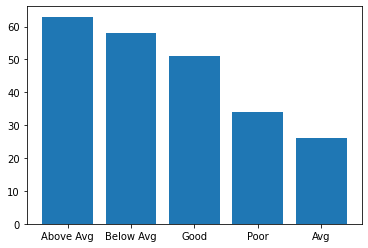

In [122]:
draw_barplot(df['marks_cat2'])


### Equal-Width Discretization

Separating all possible values into ‘N’ number of bins, each having the same width. Formula for interval width:
Width = (maximum value - minimum value) / N
* where N is the number of bins or intervals.

#### KBinsDiscretizer

The discretization transform is available in the scikit-learn Python machine learning library via the KBinsDiscretizer class.

In [84]:
from sklearn.preprocessing import KBinsDiscretizer

In [123]:
discretizer  = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [124]:
df['marks_uniform_discrete'] = discretizer.fit_transform(df['marks'].values.reshape(-1,1)).astype(int)

In [125]:
df.head()

,Student_id,Age,Grade,Employed,marks,marks_cat,marks_cat2,marks_uniform_discrete
0,1,19,1st Class,yes,29,Poor,Poor,0
1,2,20,2nd Class,no,41,Below Avg,Below Avg,1
2,3,18,1st Class,no,57,Avg,Avg,2
3,4,21,2nd Class,no,29,Poor,Poor,0
4,5,19,1st Class,no,57,Avg,Avg,2


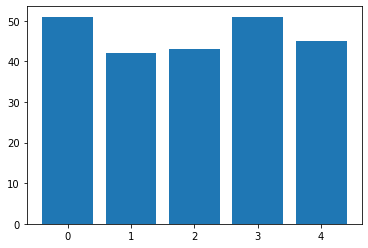

In [126]:
draw_barplot(df['marks_uniform_discrete'])

In [127]:
discretizer.bin_edges_

array([array([20. , 35.6, 51.2, 66.8, 82.4, 98. ])], dtype=object)

#### Equal frequency

Separating all possible values into ‘N’ number of bins, each having the same amount of observations. Intervals may correspond to quantile values.

In [128]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

In [129]:
df['marks_eq_freq'] = discretizer.fit_transform(df['marks'].values.reshape(-1, 1)).astype('int')

In [130]:
df.head()

,Student_id,Age,Grade,Employed,marks,marks_cat,marks_cat2,marks_uniform_discrete,marks_eq_freq
0,1,19,1st Class,yes,29,Poor,Poor,0,0
1,2,20,2nd Class,no,41,Below Avg,Below Avg,1,1
2,3,18,1st Class,no,57,Avg,Avg,2,2
3,4,21,2nd Class,no,29,Poor,Poor,0,0
4,5,19,1st Class,no,57,Avg,Avg,2,2


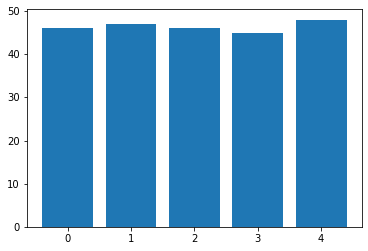

In [131]:
draw_barplot(df.marks_eq_freq)

In [132]:
discretizer.bin_edges_

array([array([20. , 35. , 51.4, 67.6, 82. , 98. ])], dtype=object)

#### K-Means Discretization

We apply K-Means clustering to the continuous variable, thus dividing it into discrete groups or clusters.

In [133]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

In [134]:
df['marks_kmeans_dis']  = discretizer.fit_transform(df['marks'].values.reshape(-1, 1)).astype('int')

In [135]:
df.head()

,Student_id,Age,Grade,Employed,marks,marks_cat,marks_cat2,marks_uniform_discrete,marks_eq_freq,marks_kmeans_dis
0,1,19,1st Class,yes,29,Poor,Poor,0,0,0
1,2,20,2nd Class,no,41,Below Avg,Below Avg,1,1,1
2,3,18,1st Class,no,57,Avg,Avg,2,2,2
3,4,21,2nd Class,no,29,Poor,Poor,0,0,0
4,5,19,1st Class,no,57,Avg,Avg,2,2,2


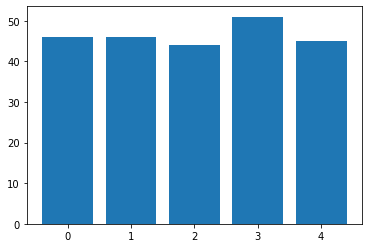

In [136]:
draw_barplot(df.marks_kmeans_dis)

### Conclusion
**Signal-to-Noise Ratio**
* When we discretize a model, we are fitting it to bins and reducing the impact of small fluctuation in the data. Often, we would consider small fluctuations as noise. We can reduce this noise through discretization. This is the process of “smoothing”, wherein each bin smoothens fluctuations, thus reducing noise in the data.

**Incompatible with models/methods**
* Certain models may be incompatible with continuous data, for example, alternative decision-tree models such as a Random-Forest model is not suitable for continuous features.

**Fits the problem statement**
* Often, it is easier to understand continuous data (such as weight) when divided and stored into meaningful categories or groups. For example, we can divide a continuous variable, weight, and store it in the following groups :
    * under weight, normal, over weight